
# Group Project in AI Applied to Engineering

##### Nima Salihzada, Tarjei Åkre Reite and Sanna Hartman Sellaeg

This notebook contains the code used to carry out the group work at the AI Applied to Engineering course.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alzheimer's disease data

The dataset we are working with is a dataset containing medical data from just over 2100 patients, of whom some have been diagnosed with Alzheimer's disease.
The data was retrieved from: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset?resource=download
We use the .shape function to check the dimensions of the dataset (number of rows and columns), the set cointains __2149 rows__ and __34 columns__. We use .head to peak at the first few rows to understand the data structure.

In [18]:
df = pd.read_csv("alzheimers_disease_data.csv")
df.describe()
df.shape
df.head

<bound method NDFrame.head of       PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumpt

We remove the variables __PatientID__ and __DoctorInCharge__ because they are not relevant for the analysis.

In [19]:
df = df.drop(columns=["PatientID", "DoctorInCharge"])


# Univariate analysis: 

We create a summary statistics for numerical variables and frequency distribution for categorical ones. We plot the correlation of each collumn with the diagnosis.

FunctionalAssessment        -0.364898
ADL                         -0.332346
MemoryComplaints             0.306742
MMSE                        -0.237126
BehavioralProblems           0.224350
SleepQuality                -0.056548
EducationLevel              -0.043966
CholesterolHDL               0.042584
Hypertension                 0.035080
FamilyHistoryAlzheimers     -0.032900
CholesterolLDL              -0.031976
Diabetes                    -0.031508
CardiovascularDisease        0.031490
BMI                          0.026343
Disorientation              -0.024648
CholesterolTriglycerides     0.022672
HeadInjury                  -0.021411
Gender                      -0.020975
PersonalityChanges          -0.020627
Confusion                   -0.019186
SystolicBP                  -0.015615
Ethnicity                   -0.014782
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
AlcoholConsumption          -0.007618
CholesterolTotal             0.006394
PhysicalActi

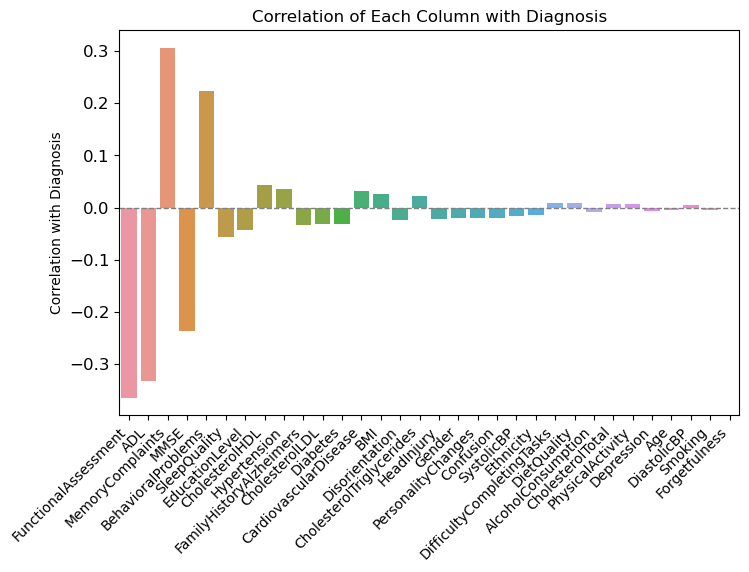

In [20]:
corr_values = df.corr()["Diagnosis"].drop("Diagnosis")
corr_values = corr_values.reindex(corr_values.abs().sort_values(ascending=False).index)
print(corr_values)

plt.figure(figsize=(8, 5))
sns.barplot(x=corr_values.index, y=corr_values.values)

# Add labels and title
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Add a zero reference line
plt.ylabel('Correlation with ' + "Diagnosis")
plt.xlabel('')
plt.title('Correlation of Each Column with ' + "Diagnosis")
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation, alignment, and size
plt.yticks(fontsize=12)  # Adjust y-axis font size

plt.show()

The dataset contains a lot of columns and we have to remove variables that provide little to no information. We decided to filter columns based on absolute correlation threshold. 

FunctionalAssessment      -0.364898
ADL                       -0.332346
MemoryComplaints           0.306742
MMSE                      -0.237126
BehavioralProblems         0.224350
SleepQuality              -0.056548
EducationLevel            -0.043966
CholesterolHDL             0.042584
Hypertension               0.035080
FamilyHistoryAlzheimers   -0.032900
CholesterolLDL            -0.031976
Diabetes                  -0.031508
CardiovascularDisease      0.031490
Name: Diagnosis, dtype: float64


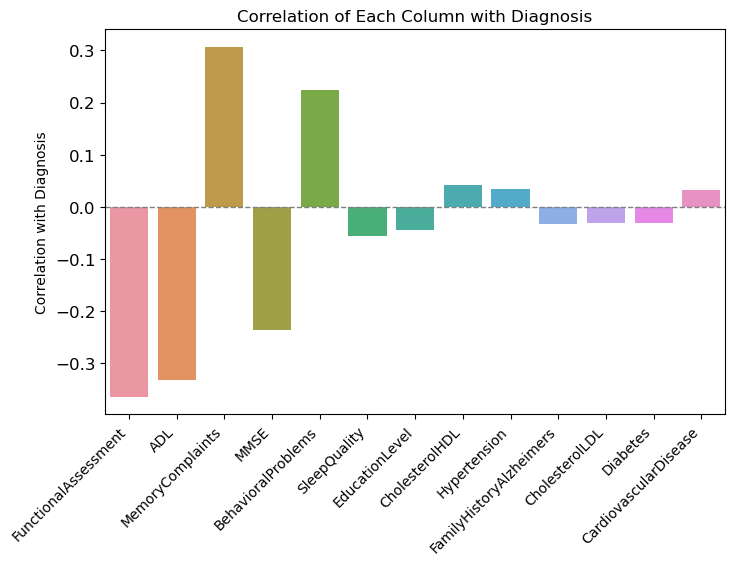

1


In [ ]:
columns_to_keep = corr_values[abs(corr_values) >= 0.03].index
df_filtered = df[columns_to_keep.union(['Diagnosis'])]

corr_values = df_filtered.corr()["Diagnosis"].drop("Diagnosis")
corr_values = corr_values.reindex(corr_values.abs().sort_values(ascending=False).index)
print(corr_values)

plt.figure(figsize=(8, 5))
sns.barplot(x=corr_values.index, y=corr_values.values)

# Add labels and title
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Add a zero reference line
plt.ylabel('Correlation with ' + "Diagnosis")
plt.xlabel('')
plt.title('Correlation of Each Column with ' + "Diagnosis")
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation, alignment, and size
plt.yticks(fontsize=12)  # Adjust y-axis font size

plt.show()
print(1)

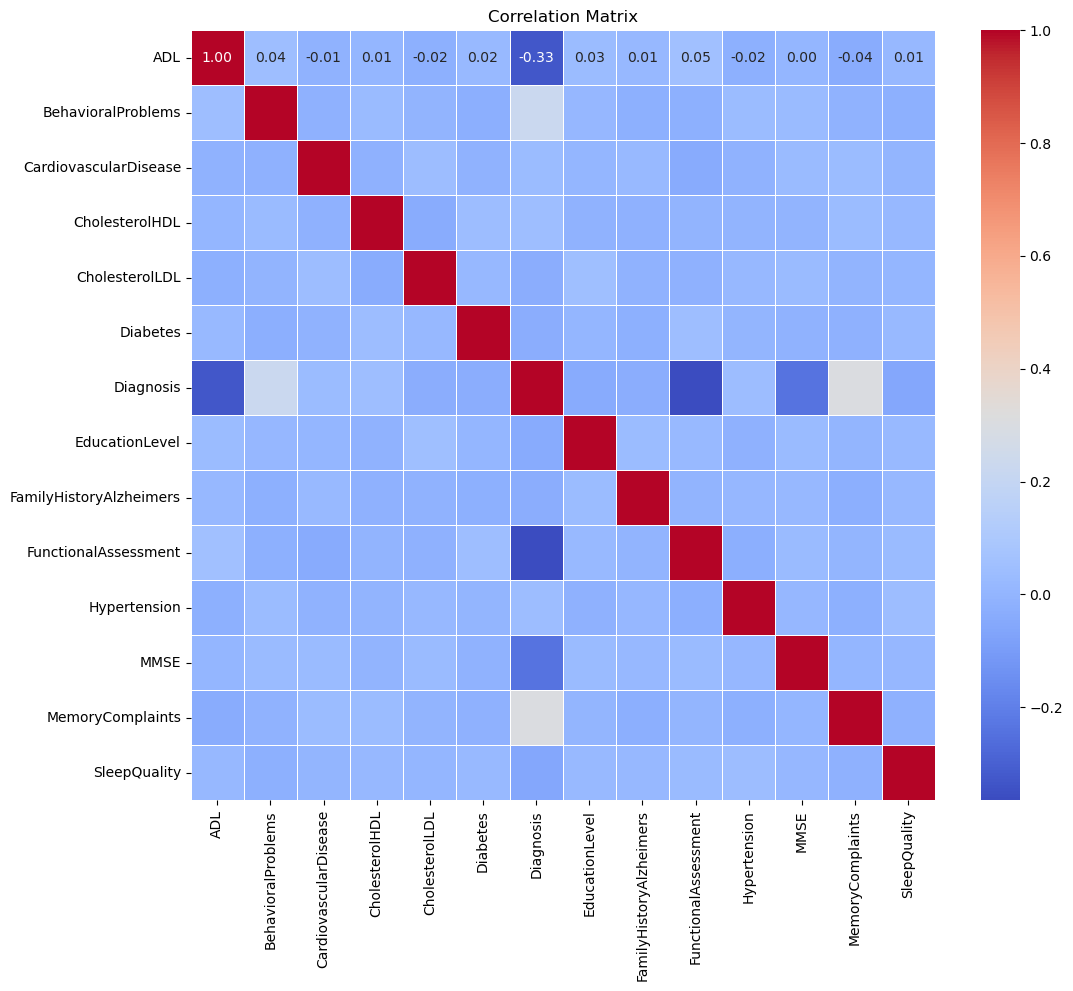

In [22]:
correlation_matrix = df_filtered.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

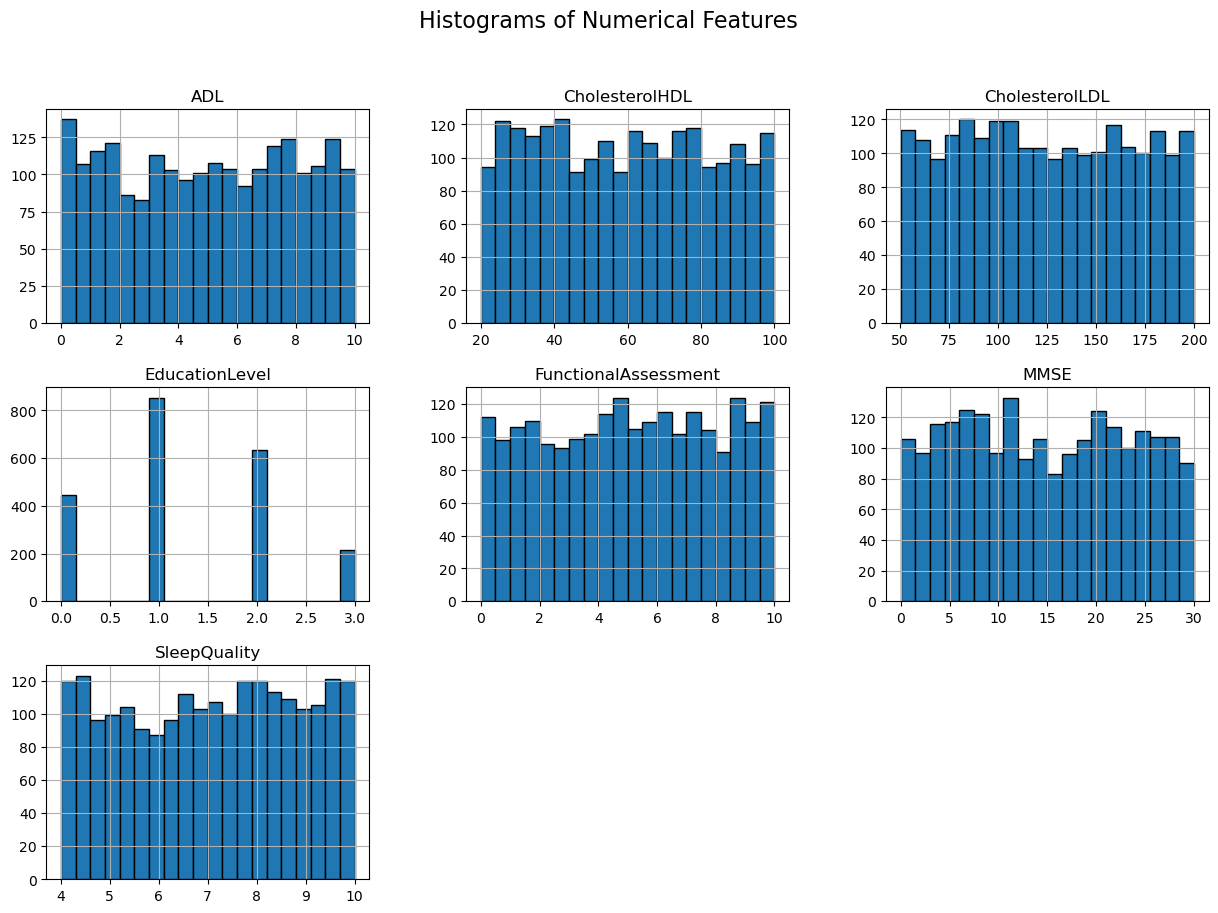

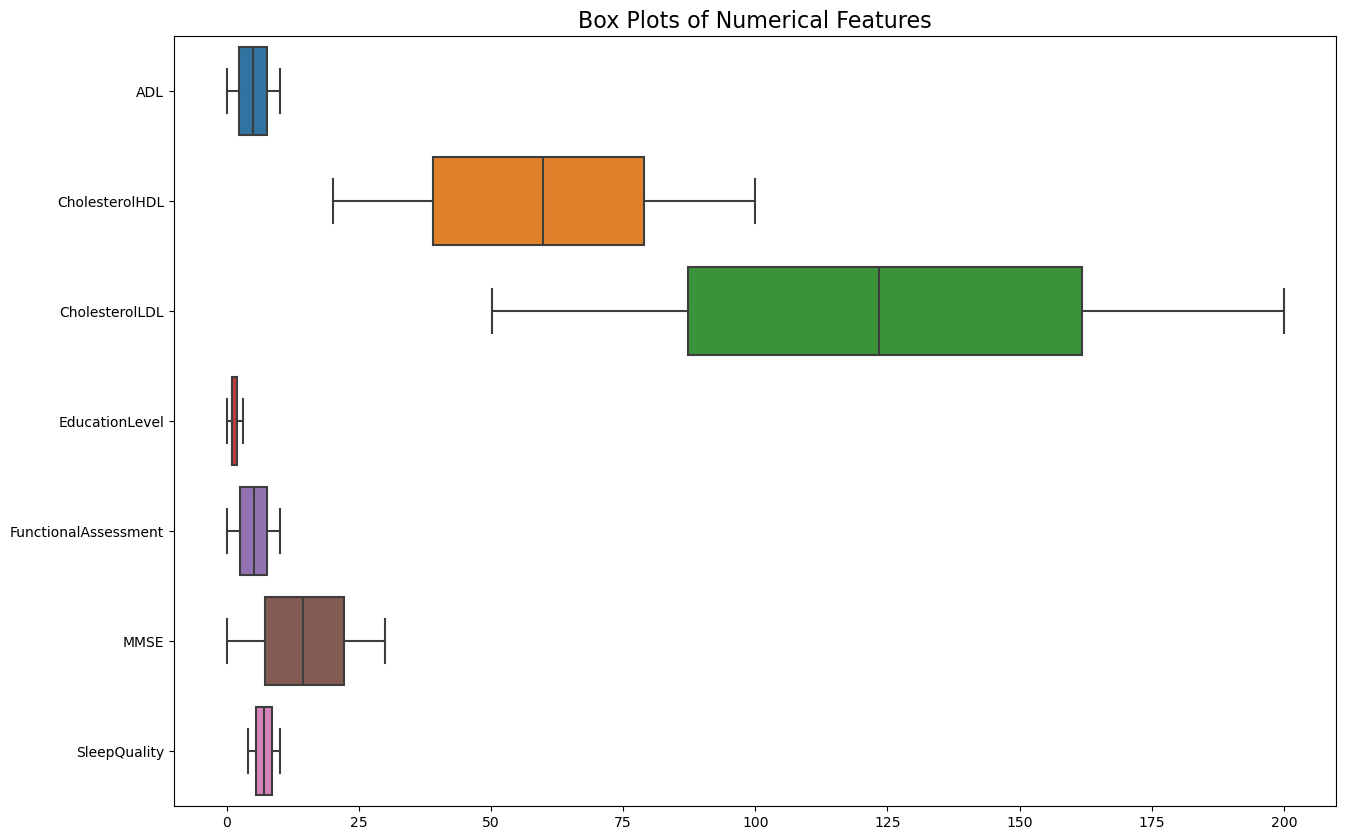

In [23]:
# Summary statistics
df_filtered.describe().T
# Summary statistics
df_filtered.describe().T

# Identify categorical columns with only 0 or 1 values
categorical_columns = df_filtered.columns[df_filtered.nunique() == 2]
numerical_columns = df_filtered.columns[df_filtered.nunique() > 2]

df_categorical = df_filtered[categorical_columns]
df_numerical = df_filtered[numerical_columns]

# Plot histograms for numerical columns
df_numerical.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_numerical, orient='h')
plt.title('Box Plots of Numerical Features', fontsize=16)
plt.show()
